In [127]:
from qiskit import * 
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_paulivec
%matplotlib inline

Circuit depth: 5


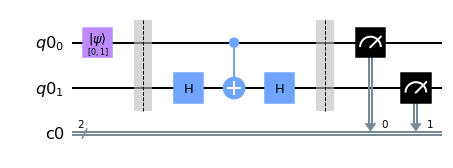

In [128]:
cr = ClassicalRegister(2, "c0")
qr = QuantumRegister(2, "q0")

circuit = qiskit.QuantumCircuit(qr, cr)

circuit.initialize([0,1], 0)

circuit.barrier()
circuit.h(1)
circuit.cx(0,1)
circuit.h(1)
circuit.barrier()

#result2 = transpile(circuit, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=3)
#result2.to_gate().control()

circuit.measure([0,1],[0,1])
print("Circuit depth: " + str(circuit.depth()))
circuit.draw(output="mpl")

In [129]:
# simulators
qasm_sim = qiskit.Aer.get_backend("aer_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [130]:
sim_state_vector = qiskit.execute(circuit, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(circuit, backend=qasm_sim, shots=1024).result().get_counts()

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


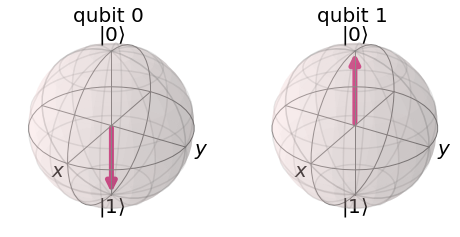

In [131]:
plot_bloch_multivector(sim_state_vector)

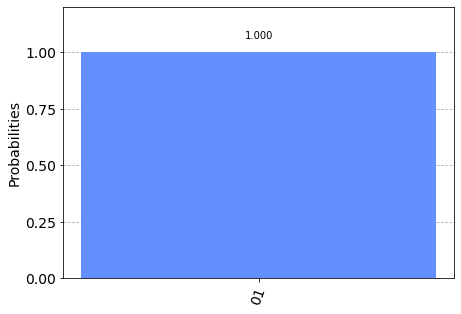

In [132]:
result = execute(circuit, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

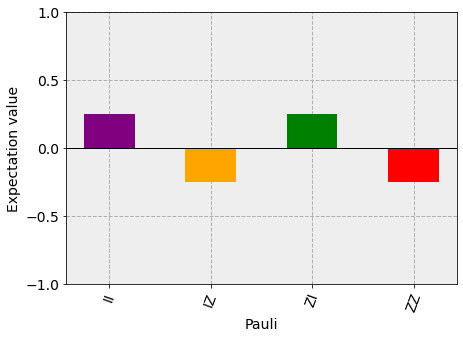

In [133]:
plot_state_paulivec(sim_state_vector, color=['purple', 'orange', 'green', 'red'])

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


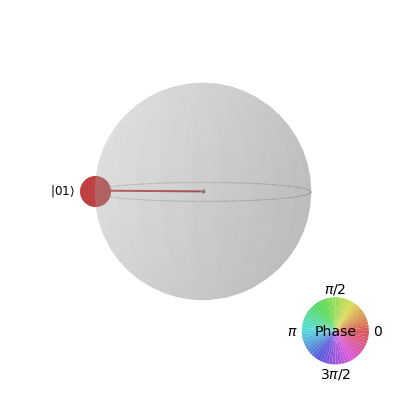

In [134]:
plot_state_qsphere(sim_state_vector)

In [135]:
circuit.qasm(formatted=True, filename="controlled_z.qasm")

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
initialize(0,1) q0[0];
barrier q0[0],q0[1];
h q0[1];
cx q0[0],q0[1];
h q0[1];
barrier q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



In [136]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_gate_map, plot_error_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor

In [137]:
if not IBMQ.active_account():
    IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [138]:
print(provider)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


In [139]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational and not b.configuration().simulator))

In [140]:
backend = least_busy(provider.backends(filters=lambda b: b.status().operational and not b.configuration().simulator))

In [141]:
backend = least_busy(provider.backends(filters=lambda b: not b.configuration().simulator))

In [142]:
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [174]:
display(backend.configuration().__dict__)

{'_data': {'acquisition_latency': [],
  'allow_q_object': True,
  'channels': {'acquire0': {'operates': {'qubits': [0]},
    'purpose': 'acquire',
    'type': 'acquire'},
   'acquire1': {'operates': {'qubits': [1]},
    'purpose': 'acquire',
    'type': 'acquire'},
   'acquire2': {'operates': {'qubits': [2]},
    'purpose': 'acquire',
    'type': 'acquire'},
   'acquire3': {'operates': {'qubits': [3]},
    'purpose': 'acquire',
    'type': 'acquire'},
   'acquire4': {'operates': {'qubits': [4]},
    'purpose': 'acquire',
    'type': 'acquire'},
   'd0': {'operates': {'qubits': [0]}, 'purpose': 'drive', 'type': 'drive'},
   'd1': {'operates': {'qubits': [1]}, 'purpose': 'drive', 'type': 'drive'},
   'd2': {'operates': {'qubits': [2]}, 'purpose': 'drive', 'type': 'drive'},
   'd3': {'operates': {'qubits': [3]}, 'purpose': 'drive', 'type': 'drive'},
   'd4': {'operates': {'qubits': [4]}, 'purpose': 'drive', 'type': 'drive'},
   'm0': {'operates': {'qubits': [0]},
    'purpose': 'measure',

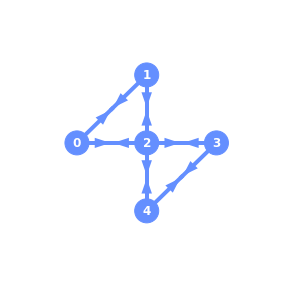

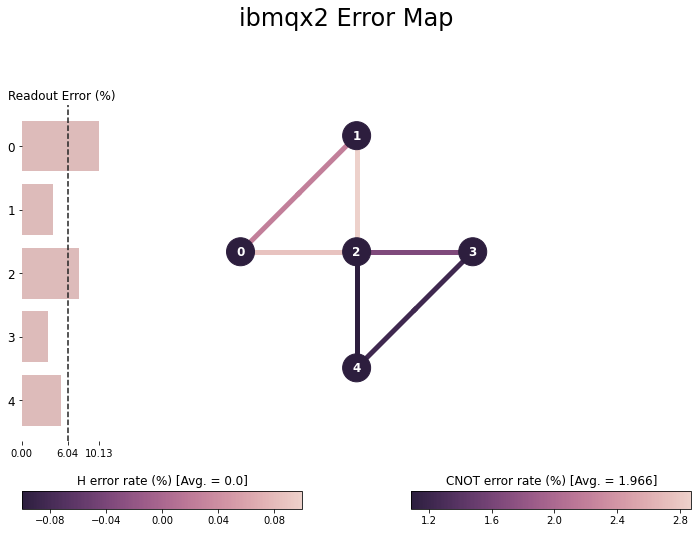

In [143]:
display(plot_gate_map(backend, plot_directed=True))
display(plot_error_map(backend))

In [144]:
all_backends_available = provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational and not b.configuration().simulator)

In [147]:
counts = {}

for backend in all_backends_available[0:3]:
    
    job = execute(circuit, backend, shots=1000)
    
    print("Backend: " + backend.name() + " - Job ID: " + job.job_id())
    
    job_monitor(job)
    
    print("\n")
    
    result = job.result()
    counts[backend.name()] = result.get_counts(circuit)

Backend: ibmqx2 - Job ID: 60c06b68f64d0dd2b25af23c
Job Status: job has successfully run


Backend: ibmq_16_melbourne - Job ID: 60c06b7adf87c2f3fff79bc3
Job Status: job has successfully run


Backend: ibmq_athens - Job ID: 60c07065ac71df124ae6c089
Job Status: job has successfully run




In [151]:
counts["local_simulator"] = counts_sim


Raw results: {'ibmqx2': {'00': 128, '01': 836, '10': 9, '11': 27}, 'ibmq_16_melbourne': {'00': 113, '01': 795, '10': 11, '11': 81}, 'ibmq_athens': {'00': 18, '01': 967, '11': 15}, 'local_simulator': {'01': 1024}}


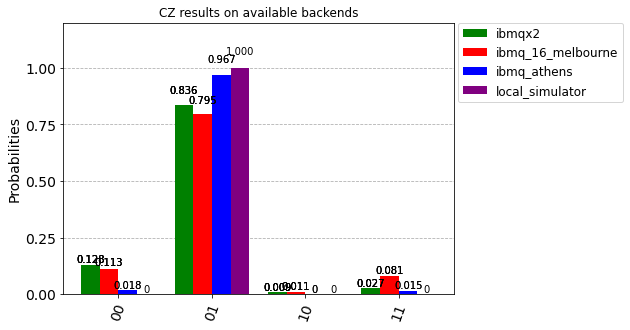

In [153]:
print("\nRaw results:", counts)

colors = ['green', 'red', 'blue', 'purple', 'brown', 'yellow']

display(plot_histogram(list(counts.values()), 
                       title = "CZ results on available backends", 
                       legend=list(counts), 
                       color = colors[0:len(colors)], bar_labels=True))

In [154]:
provider.backends(filters=lambda b: not b.configuration().simulator)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [155]:
import qiskit.quantum_info as qi

matrix_density = qi.DensityMatrix(sim_state_vector)
matrix_density.draw('latex', prefix='\\ Matrix\ Density = ')

<IPython.core.display.Latex object>

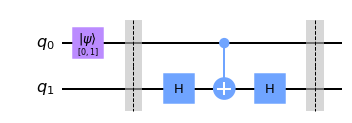

In [156]:
circuit = qiskit.QuantumCircuit(2)

circuit.initialize([0,1], 0)

circuit.barrier()
circuit.h(1)
circuit.cx(0,1)
circuit.h(1)
circuit.barrier()

circuit.draw('mpl')


Backend: ibmqx2 / Num. qubits: 5


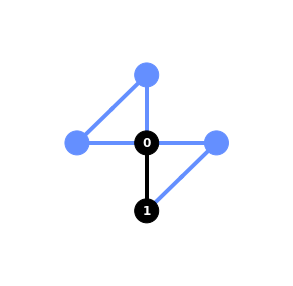


Backend: ibmq_16_melbourne / Num. qubits: 15


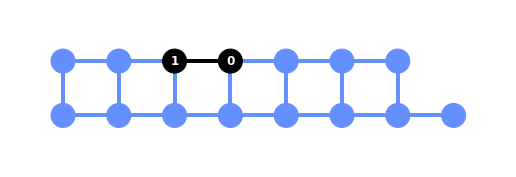


Backend: ibmq_athens / Num. qubits: 5


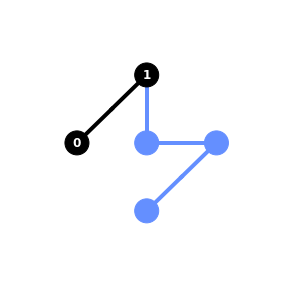


Backend: ibmq_santiago / Num. qubits: 5


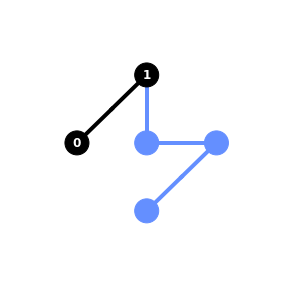


Backend: ibmq_lima / Num. qubits: 5


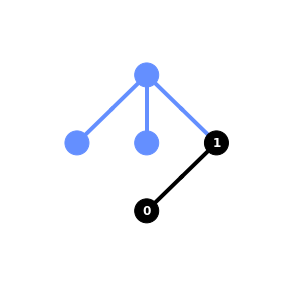


Backend: ibmq_belem / Num. qubits: 5


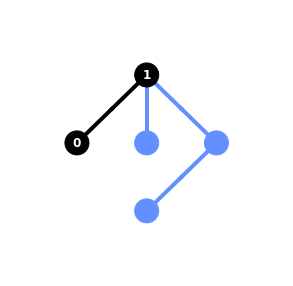


Backend: ibmq_quito / Num. qubits: 5


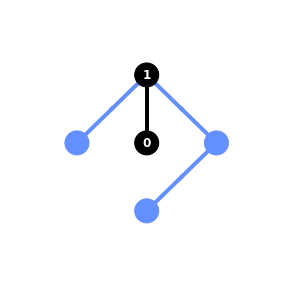


Backend: ibmq_manila / Num. qubits: 5


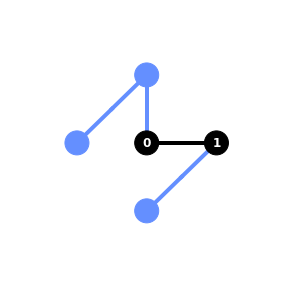

In [157]:
for i in range(len(all_backends_available)):

    curent_backend = all_backends_available[i]
    transpiled_circuit = transpile(circuit, backend=curent_backend, optimization_level=3)
    
    print("\nBackend: " + curent_backend.name() + " / Num. qubits: " + str(curent_backend.configuration().n_qubits))
    display(plot_circuit_layout(transpiled_circuit, curent_backend))

In [167]:
usim = Aer.get_backend('unitary_simulator')

transpiled = transpile(circuit, backend=usim, optimization_level=3)

qobj = assemble(transpiled)

unitary = usim.run(qobj).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit operation = }\n")

<IPython.core.display.Latex object>

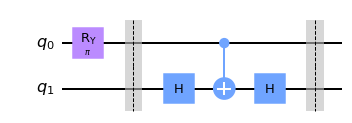

In [168]:
transpiled.draw('mpl')

In [160]:
from qiskit.quantum_info import Operator

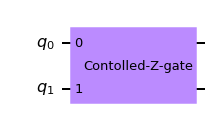

In [161]:
# create circuit from unitary matrix
operator_matrix = Operator(unitary)

qc = QuantumCircuit(2)

qc.unitary(operator_matrix, [0,1], label='Contolled-Z-gate')

qc.draw(output='mpl')

In [162]:
# random unitary matrix
from qiskit.quantum_info import Operator, random_unitary
U = random_unitary(4, seed=None)

from qiskit.visualization import array_to_latex
array_to_latex(U, prefix="\\text{random unitary matrix = }\n")

<IPython.core.display.Latex object>

In [163]:
retrieved_job = all_backends_available[0].retrieve_job("60bd2a7c61f15fc4f4ba0cbe")

In [164]:
retrieved_job.job_id()

'60bd2a7c61f15fc4f4ba0cbe'

In [165]:
job_monitor(retrieved_job)

Job Status: job has successfully run


In [166]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [190]:
import numpy as np
  
A = np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])
  
print(np.linalg.inv(A))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [191]:
A = np.array([[1,3,8],
              [3,1,4],
              [8,4,1]])

print(A.T)

[[1 3 8]
 [3 1 4]
 [8 4 1]]


In [192]:
A = np.array([[1,4,3],
              [1,-1,1],
              [3.5,1,-2.5]])

B = np.array([[2,2,1.75],
              [8,-2,0.5],
              [6,2,-1.25]])

np.matmul(A,B)

array([[52.  ,  0.  ,  0.  ],
       [ 0.  ,  6.  ,  0.  ],
       [ 0.  ,  0.  ,  9.75]])